{'whiskers': [<matplotlib.lines.Line2D at 0x215f3b37760>,
 'caps': [<matplotlib.lines.Line2D at 0x215f3b37ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x215f3b374c0>],
 'medians': [<matplotlib.lines.Line2D at 0x215f3b4c220>],
 'fliers': [<matplotlib.lines.Line2D at 0x215f3b4c4c0>],
 'means': []}

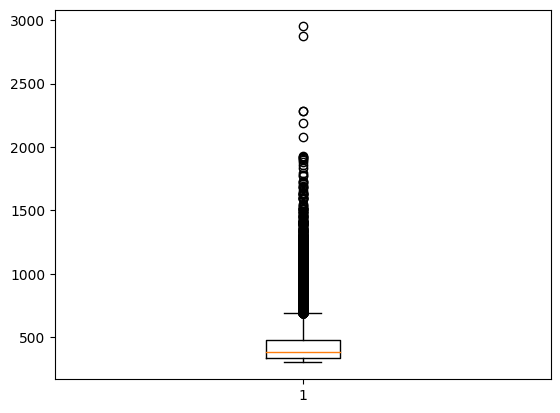

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


new_filename = "cleaned_data.txt"
song_length = 300

with open("all_tunes_cleaned.txt", "r") as f:
    all_songs = []
    do_print = False
    song_sample = []

    for i, line in enumerate(f):
        if line[0] == "M":
            do_print = True

        if line[0] == "X":
            if do_print == True:
                all_songs.append("".join(song_sample))
                song_sample = []
            do_print = False

        if do_print:
            song_sample.append(line)


df = pd.DataFrame(all_songs)
df["song_length"] = [len(song) for song in df[0]]

df = df[df["song_length"] > song_length]


plt.boxplot(df["song_length"])

In [ ]:
df.rename(columns = {0: "song"}, inplace = True)

In [ ]:
import json

# Load the character-to-index mapping
with open("char_to_idx.json", "r") as f:
    char_to_idx = json.load(f)

idx_to_char = {v: k for k, v in char_to_idx.items()}  # Reverse mapping
idx_to_char

{0: '\n',
 1: ' ',
 2: '!',
 3: '"',
 4: '#',
 5: '%',
 6: '&',
 7: "'",
 8: '(',
 9: ')',
 10: '+',
 11: ',',
 12: '-',
 13: '.',
 14: '/',
 15: '0',
 16: '1',
 17: '2',
 18: '3',
 19: '4',
 20: '5',
 21: '6',
 22: '7',
 23: '8',
 24: '9',
 25: ':',
 26: '=',
 27: '?',
 28: 'A',
 29: 'B',
 30: 'C',
 31: 'D',
 32: 'E',
 33: 'F',
 34: 'G',
 35: 'H',
 36: 'I',
 37: 'J',
 38: 'K',
 39: 'L',
 40: 'M',
 41: 'N',
 42: 'O',
 43: 'P',
 44: 'Q',
 45: 'R',
 46: 'S',
 47: 'T',
 48: 'U',
 49: 'V',
 50: 'W',
 51: 'X',
 52: 'Y',
 53: '[',
 54: '\\',
 55: ']',
 56: '^',
 57: '_',
 58: 'a',
 59: 'b',
 60: 'c',
 61: 'd',
 62: 'e',
 63: 'f',
 64: 'g',
 65: 'h',
 66: 'i',
 67: 'j',
 68: 'k',
 69: 'l',
 70: 'm',
 71: 'n',
 72: 'o',
 73: 'p',
 74: 'q',
 75: 'r',
 76: 's',
 77: 't',
 78: 'u',
 79: 'v',
 80: 'w',
 81: 'x',
 82: 'y',
 83: 'z',
 84: '|',
 85: '~'}

In [ ]:
index_to_char = dict()
i = 0

for song in df["song"]:
    for char in song:
        if char not in index_to_char.values():
            index_to_char[i] = char
            i+=1

In [ ]:
char_to_idx = {value: key for key, value in index_to_char.items()}
char_to_idx

{'M': 0,
 ':': 1,
 '2': 2,
 '/': 3,
 '4': 4,
 '\n': 5,
 'K': 6,
 'D': 7,
 'A': 8,
 'F': 9,
 ' ': 10,
 'd': 11,
 '|': 12,
 'c': 13,
 'e': 14,
 'g': 15,
 'f': 16,
 'z': 17,
 'B': 18,
 '[': 19,
 'G': 20,
 ']': 21,
 '>': 22,
 'C': 23,
 'E': 24,
 ',': 25,
 '3': 26,
 'a': 27,
 '(': 28,
 '1': 29,
 '-': 30,
 '"': 31,
 '^': 32,
 ')': 33,
 'm': 34,
 'b': 35,
 '=': 36,
 'Q': 37,
 '0': 38,
 'S': 39,
 't': 40,
 'r': 41,
 'h': 42,
 's': 43,
 'p': 44,
 'y': 45,
 '.': 46,
 'u': 47,
 'v': 48,
 '<': 49,
 '8': 50,
 '6': 51,
 '7': 52,
 'i': 53,
 'n': 54,
 '_': 55,
 '!': 56,
 '5': 57,
 'l': 58,
 '\\': 59,
 'P': 60,
 'T': 61,
 'o': 62,
 '{': 63,
 '}': 64,
 'x': 65,
 "'": 66,
 '#': 67,
 'w': 68,
 'V': 69,
 '&': 70,
 'L': 71,
 'k': 72,
 'I': 73,
 '9': 74,
 'H': 75,
 'R': 76,
 '?': 77,
 'O': 78,
 'W': 79,
 'J': 80,
 '*': 81,
 'N': 82,
 'q': 83,
 'U': 84,
 'j': 85,
 '+': 86,
 '$': 87,
 ';': 88,
 'X': 89,
 'Y': 90,
 '~': 91,
 'Z': 92,
 '@': 93,
 '`': 94}

In [ ]:
df["truncated song"] = df.apply(lambda x: x["song"][:song_length], axis=1)

In [ ]:
df["truncated song length"] = [len(song) for song in df["truncated song"]]
df["truncated song length"].describe()

count    62880.0
mean       300.0
std          0.0
min        300.0
25%        300.0
50%        300.0
75%        300.0
max        300.0
Name: truncated song length, dtype: float64

In [ ]:
data = [char_to_idx[char] for char in df["truncated song"] if char in char_to_idx]

mapped_songs = []

for song in df["truncated song"]:
        mapped_songs.append([char_to_idx[char]for char in song])

df["mapped_string"] = mapped_songs

df["mapped_string"].to_json("mapped_string.json")

In [ ]:
df["mapped_string"]

6         [0, 1, 2, 3, 4, 5, 6, 1, 7, 5, 8, 2, 9, 2, 10,...
8         [0, 1, 4, 3, 4, 5, 6, 1, 8, 5, 23, 7, 10, 12, ...
9         [0, 1, 2, 3, 4, 5, 6, 1, 7, 5, 8, 25, 10, 8, 2...
11        [0, 1, 4, 3, 4, 5, 6, 1, 20, 5, 7, 9, 10, 12, ...
12        [0, 1, 4, 3, 4, 5, 6, 1, 8, 5, 37, 1, 29, 2, 3...
                                ...                        
214109    [0, 1, 4, 3, 4, 5, 6, 1, 7, 34, 53, 54, 5, 37,...
214110    [0, 1, 2, 3, 4, 5, 6, 1, 8, 5, 16, 3, 10, 12, ...
214117    [0, 1, 4, 3, 4, 5, 6, 1, 20, 5, 28, 15, 3, 22,...
214118    [0, 1, 26, 3, 4, 5, 6, 1, 8, 5, 12, 1, 10, 19,...
214119    [0, 1, 2, 3, 4, 5, 6, 1, 7, 5, 37, 1, 29, 29, ...
Name: mapped_string, Length: 62880, dtype: object

In [ ]:
import json

with open("char_to_idx_truncated.json", "w") as outfile:
    json.dump(char_to_idx, outfile)



In [ ]:
f"{char_to_idx}"

'{\'M\': 0, \':\': 1, \'2\': 2, \'/\': 3, \'4\': 4, \'\\n\': 5, \'K\': 6, \'D\': 7, \'A\': 8, \'F\': 9, \' \': 10, \'d\': 11, \'|\': 12, \'c\': 13, \'e\': 14, \'g\': 15, \'f\': 16, \'z\': 17, \'B\': 18, \'[\': 19, \'G\': 20, \']\': 21, \'>\': 22, \'C\': 23, \'E\': 24, \',\': 25, \'3\': 26, \'a\': 27, \'(\': 28, \'1\': 29, \'-\': 30, \'"\': 31, \'^\': 32, \')\': 33, \'m\': 34, \'b\': 35, \'=\': 36, \'Q\': 37, \'0\': 38, \'S\': 39, \'t\': 40, \'r\': 41, \'h\': 42, \'s\': 43, \'p\': 44, \'y\': 45, \'.\': 46, \'u\': 47, \'v\': 48, \'<\': 49, \'8\': 50, \'6\': 51, \'7\': 52, \'i\': 53, \'n\': 54, \'_\': 55, \'!\': 56, \'5\': 57, \'l\': 58, \'\\\\\': 59, \'P\': 60, \'T\': 61, \'o\': 62, \'{\': 63, \'}\': 64, \'x\': 65, "\'": 66, \'#\': 67, \'w\': 68, \'V\': 69, \'&\': 70, \'L\': 71, \'k\': 72, \'I\': 73, \'9\': 74, \'H\': 75, \'R\': 76, \'?\': 77, \'O\': 78, \'W\': 79, \'J\': 80, \'*\': 81, \'N\': 82, \'q\': 83, \'U\': 84, \'j\': 85, \'+\': 86, \'$\': 87, \';\': 88, \'X\': 89, \'Y\': 90, \'~

In [ ]:

i = 0
j= 0
for song in df["song"]:
    for char in song:
        if char == " ":
            i +=1
            j += 1
        else:
            j+=1

In [ ]:
i/j

0.2527368098237199

# Remove White spaces


In [ ]:
data_filepath = "/insert_file_path/all_tunes_cleaned.txt"

with open(data_filepath) as file:
  data = file.read()




In [ ]:
data = data.replace(" ", "")

In [ ]:
data_save_filepath = "/insert_file_path/all_tunes_cleaned_removed_whitespace.txt"
with open(data_save_filepath, "w") as file:
  file.write(data)